In [ ]:
#Data preprocessing starts here
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

In [ ]:
iris = datasets.load_iris()

In [ ]:
X = iris.data[:, :2]
y = (iris.target != 0) * 1

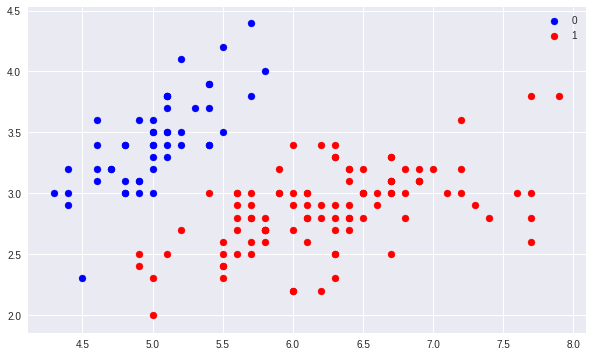

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='b', label='0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='1')
plt.legend();
#Data preprocessing ends here

In [ ]:

import random

Train = []
Test = []
Validation = []

for i in range(0, len(X)):
  m=[]
  m.append(X[i][0])
  m.append(X[i][1])
  m.append(y[i])
  number = random.uniform(0, 1)
  if(number>0.7 and number <= 0.85):    
    Validation.append(m)
  elif(number>0.85 and number<=1.0):
    Test.append(m)
  else:
    Train.append(m)

print("train:",len(Train))
print("test:",len(Test))
print("validation:",len(Validation))



import math
inputY=[]

dtheta1=0
dtheta2=0
dtheta3=0
lr=.9777
theta1=.3
theta2=.5
theta3=.7

for i in range (0,5000):
 
  total_loss=0
  total_dtheta1=0
  total_dtheta2=0
  total_dtheta3=0
    
  for j in range(0,len(Train)):
     
    inputY=Train[j]
    
    n=inputY[0]*theta1+inputY[1]*theta2+theta3
    h=1/(1+math.exp(-n))
    
 
    if(h==0):
      h=.0000000001
      
    lossJ=(-inputY[-1]*math.log(h))-(1-inputY[-1])*math.log(1-h)
    
    total_loss +=lossJ
    
    dtheta1 =inputY[0]*(h-inputY[-1])
    dtheta2 = inputY[1]*(h-inputY[-1])
    dtheta3 = (h-inputY[-1])


    total_dtheta1 +=dtheta1
    total_dtheta2 +=dtheta3
    total_dtheta3 +=dtheta3

  avrg_loss =(1/len(Train))*total_loss
  avrg_dtheta1 =(1/len(Train))*total_dtheta1
  avrg_dtheta2 =(1/len(Train))*total_dtheta2
  avrg_dtheta3 =(1/len(Train))*total_dtheta3

  theta1=theta1-(lr*dtheta1 )
  theta2=theta2-(lr*dtheta2 )
  theta3=theta3-(lr*dtheta3 )


  print(avrg_loss)



accuracy=0
count=0
inputX=[]
for i in range(0, len(Validation)):
  inputX=Validation[i]
  n=inputX[0]*theta1+inputX[1]*theta2+theta3
  h=1/(1+math.exp(-n))
  if(h>=.5):
    h=1
  else:
    h=0
       
  if inputX[-1]==h:
    count +=1

accuracy=(count/len(Validation))*100
print("Accuracy =",accuracy)

train: 106
test: 23
validation: 21
1.3147298254223627
1.5488907440171649
1.6560297381637792
1.731115139627145
1.7896530285051602
1.8378652979933838
1.8789558997120581
1.9148131211934054
1.946650826314264
1.9752986133667303
2.0013500082929343
2.0252450371850754
2.047319378589443
2.0678351865161604
2.0870012529890962
2.1049866667886916
2.1219303433432692
2.1379478437889667
2.1531363620850406
2.167578442710072
2.181344799192215
2.1944964832373968
2.207086576650685
2.2191615270978855
2.2307622142993373
2.2419248095852318
2.252681475205986
2.2630609380509954
2.273088963971575
2.28278875273068
2.292181269039667
2.3012855217326464
2.3101188005543523
2.3186968780727653
2.3270341827176897
2.335143947772044
2.343038340225889
2.350728572679869
2.358225000910016
2.3655372092478526
2.372674085560823
2.379643887319433
2.38645429999533
2.3931124888363344
2.399625144901213
2.4059985261022763
2.4122384938934376
2.4183505461465145
2.424339846683011
2.4302112518613828
2.435969334566292
2.4416184058986743

In [ ]:
#Do not even think about copying from here
class LogisticRegression:
    def __init__(self, lr=0.01, num_iter=100000, fit_intercept=True, verbose=True):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
        self.verbose = verbose
    
    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    def __loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
    def fit(self, X, y):
        if self.fit_intercept:
            X = self.__add_intercept(X)
        # weights initialization
        self.theta = np.zeros(X.shape[1])
        
        for i in range(self.num_iter):
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / y.size
            self.theta -= self.lr * gradient
            
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            loss = self.__loss(h, y)
                
            if(self.verbose ==True and i % 10000 == 0):
                print(f'loss: {loss} \t')
    
    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)
    
        return self.__sigmoid(np.dot(X, self.theta))
    
    def predict(self, X):
        return self.predict_prob(X).round()
   

In [ ]:
model = LogisticRegression(lr=0.1, num_iter=300000)

In [ ]:
%time model.fit(X, y)

loss: 0.6106904453410645 	
loss: 0.03432718644226483 	
loss: 0.02878665213455816 	
loss: 0.025718548517683616 	
loss: 0.02340842758463659 	
loss: 0.021507024522720526 	
loss: 0.019892368181604822 	
loss: 0.0185031664409479 	
loss: 0.017299193592041292 	
loss: 0.016249738703587754 	
loss: 0.015329838490314577 	
loss: 0.014518833591009722 	
loss: 0.013799605037762784 	
loss: 0.013158006956155629 	
loss: 0.012582374964505384 	
loss: 0.012063092454345654 	
loss: 0.011592216936374905 	
loss: 0.01116316678090668 	
loss: 0.010770464048285664 	
loss: 0.01040952627650975 	
loss: 0.01007649925054516 	
loss: 0.009768123172684362 	
loss: 0.009481625616205877 	
loss: 0.009214635760287644 	
loss: 0.008965115461932606 	
loss: 0.008731303635409655 	
loss: 0.008511671162408274 	
loss: 0.008304884158053572 	
loss: 0.008109773891466268 	
loss: 0.007925312028698209 	
CPU times: user 15.5 s, sys: 148 ms, total: 15.6 s
Wall time: 15.4 s


In [ ]:
preds = model.predict(X)
#(preds == y).mean()
preds == y

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [ ]:
model.theta

array([-25.89066442,  12.523156  , -13.40150447])